In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from scipy import optimize

from sklearn.preprocessing import PolynomialFeatures

import csv

import time

# 1 Univariate Logistic Regression

In [2]:
dataFile = 'ex2data1.txt'

# 1.1 Data Visualisation

In [3]:
dataFrame = pd.read_csv(dataFile, header = None, names = ['x1', 'x2', 'y'])
sampleSize, nVariables = dataFrame.shape
print(dataFrame.head())
print ("sampleSize =", sampleSize, "nVariables =", nVariables)

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
sampleSize = 100 nVariables = 3


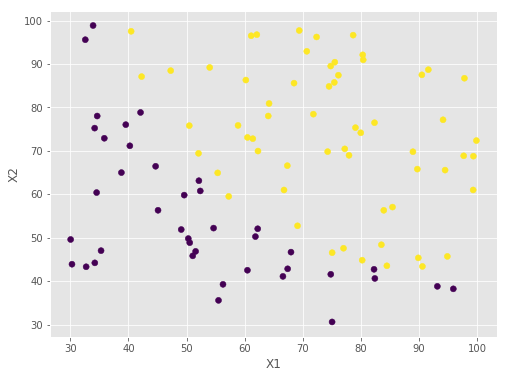

In [4]:
x1 = dataFrame['x1']
x2 = dataFrame['x2']
plt.figure(figsize=(8,6))
plt.scatter(x1, x2, c = dataFrame['y'])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## 1.2 Data Extraction and Transformation

In [5]:
def getData(dataFile):
#     try wiht matrices as well
    data = np.loadtxt(dataFile, delimiter = ',')
    sampleSize, nVariables = data.shape
    X = np.insert(data[:, :-1], 0, 1, axis=1)
    y = data[:, -1:]
#     beta = np.matrix(np.zeros(nVariables)).T
    beta = np.zeros(nVariables)
    return beta, X.flatten(), y.flatten(), sampleSize, nVariables

## 1.3 Logistic Regression
### 1.3.1 Logistic Regression

**Sigmoid Function** ${\sigma}(z) = \frac{1}{1 + e^{-z}}$


### 1.3.2 Vectorisation of Logistic Regression

**Hypothesis** $h_{\beta}(X) =   \frac{1}{1 + e^{X\cdot\beta}}$

**Cost Function** $J = \frac{-1}{n}\sum(y^T\cdot \log h_{\beta} +(1-y)^T\cdot \log (1-h_{\beta}))$

In [29]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def hypothesis(beta, X, sampleSize, nVariables):
    beta = beta.reshape(nVariables, -1)
    X = X.reshape(sampleSize, -1)
    return sigmoid(np.dot(X, beta))

# def costFunction(X, y, beta):
def costFunction(beta, X, y, sampleSize, nVariables, iLambda = 0.):
#     beta = beta.reshape(nVariables, -1)
#     X = X.reshape(sampleSize, -1)
    y = y.reshape(sampleSize, -1)
#     hypothesis vector h(n, 1)
    h = hypothesis(beta, X, sampleSize, nVariables)
#     cost scalar J(1, 1)
    J = (- np.dot(y.T, np.log(h)) - np.dot((1-y).T, np.log(1-h)))/sampleSize
#     similarly cost J can be calculated using np.multiply together with np.sum
#     cost = -np.sum(np.multiply(y, np.log(h)) + np.multiply((1-y), np.log(1-h)))/sampleSize
#     regularisation scalar (R)
    R = iLambda*np.dot(beta[1:].T,beta[1:])/(2*sampleSize)
    return (J + R)[0][0]

def betaOptimisation (beta, X, y, sampleSize, nVariables, iLambda=0.):
    return optimize.fmin(costFunction, x0=beta, args=(X, y, sampleSize, nVariables, iLambda), maxiter=1500, full_output=True)

def estimate(beta, X, sampleSize, nVariables):
    return hypothesis(beta, X, sampleSize, nVariables) >= 0.5

def goodnessOfFit(beta, X, y,  sampleSize, nVariables):
    beta_R = beta.reshape(nVariables, -1)
    X_R = X.reshape(sampleSize, -1)
    y_R = y.reshape(sampleSize, -1)
    h = estimate(beta, X, sampleSize, nVariables).flatten()
#     Nice way to calculate tPos, fPos, and fNeg.
    tPos =  np.sum(y*h)
    fPos = np.sum(y-h==1)
    fNeg = np.sum(y-h==-1)
    precision  = tPos/(tPos+fPos)
    recall  = tPos/(tPos+fNeg)
    correctPredictions = (X.shape[0] - fPos - fNeg)/X.shape[0]
    print("Precision =", precision, "\nRecall =", recall, "\nCorrect Predictions", correctPredictions)
    
    plt.figure(figsize=(8,6))
    x1 = X_R[:, 1:2]
    x2 = X_R[:, 2:]
    plt.scatter(x1, x2, c = y_R[:, 0:])
    x2Fit = - beta_R[0]/beta_R[2] - x1*beta_R[1]/beta_R[2]
    plt.plot(x1, x2Fit, '-')
    plt.xlabel("X1")
    plt.ylabel("X2")
    return plt.show()
    

## 1.4 Function Tests

In [30]:
betaTest, X, y, sampleSize, nVariables = getData(dataFile)
y.shape

(100,)

### 1.4.1 Cost-Function Test
The outputs of the costFunction should be as follows:<br\>
betaTest (set to zeros), X, iLambda=0. — **J = 0.693** (Andrew Ng) <br\>

In [31]:
print("J =", costFunction(betaTest, X, y, sampleSize, nVariables))

J = 0.69314718056


### 1.5.1 Prediction Test
The outputs of the costFunction should be as follows:<br\>
Exam_1: 45, Exam_2: 85 — **P = 0.776** (Andrew Ng) <br\>

In [32]:
betaOpt = betaOptimisation(betaTest, X, y, sampleSize, nVariables)[0]
xTest = np.array([1, 45, 85])
sampleSizeTest = 1
print("P =", hypothesis(betaOpt, xTest, sampleSizeTest, nVariables)[0][0])

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
P = 0.776291590411


## 1.5 Results Visualisation & Analysis

Precision = 0.916666666667 
Recall = 0.901639344262 
Correct Predictions 0.963333333333


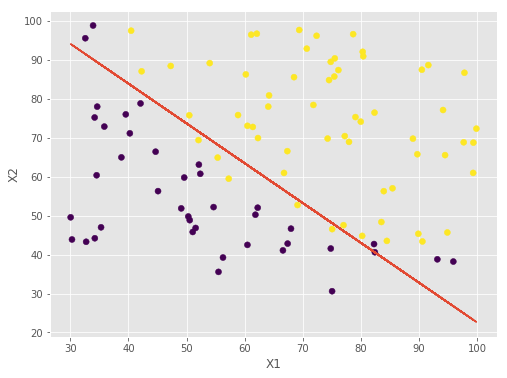

In [10]:
goodnessOfFit(betaOpt, X, y, sampleSize, nVariables)

http://www.johnwittenauer.net/tag/machine-learning/

http://aimotion.blogspot.se/2011/11/machine-learning-with-python-logistic.html

https://beckernick.github.io/logistic-regression-from-scratch/

https://github.com/kaleko/CourseraML/blob/master/ex2/ex2.ipynb

http://www.scipy-lectures.org/advanced/mathematical_optimization/

# 2 Multivariate Logistic Regression

In [11]:
dataFile_2 = 'ex2data2.txt'
dF_2 = pd.read_csv(dataFile_2, header = None)
sampleSize, nVariables = dF_2.shape
print ("sampleSize =", sampleSize, "nVariables =", nVariables)
print (dF_2.head())

sampleSize = 118 nVariables = 3
          0        1  2
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1


## 2.1 Data Visualisation

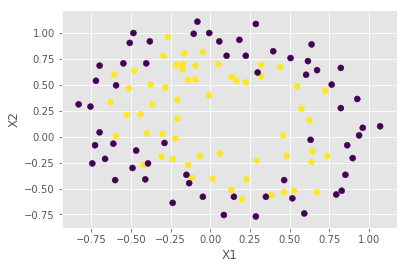

In [12]:
X_1s = dF_2.iloc[:, :1]
X_2s = dF_2.iloc[:, 1:2]
colour = dF_2.iloc[:, 2:]
plt.scatter(X_1s, X_2s, c = colour)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 2.2 Data Extraction Transformation
Add **polynomial** and **interaction** features using **SciKitLearn Preprocessing**<br\>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [33]:
def addPolynomial(dataFile, polynomialDegree):
    data = np.loadtxt(dataFile, delimiter = ',')
    sampleSize, nVariables = data.shape
    X = data[:, :-1]
    y = data[:, -1:]
    poly = PolynomialFeatures(polynomialDegree)
#     X without intercept is passed to PolynomialFeatures.fit_transform.
#     Intercept is added automatically.
    polyX = poly.fit_transform(X)
    sampleSize, nVariables = polyX.shape
    beta = np.zeros((nVariables,1))
    return beta.flatten(), polyX.flatten(), y.flatten(), sampleSize, nVariables

In [34]:
# data = np.loadtxt(dataFile, delimiter = ',')
# sampleSize, nVariables = data.shape
# X = data[:, :-1]
# y = data[:, -1:]
# poly = PolynomialFeatures(6)
# polyX = poly.fit_transform(X)
# sampleSize, nVariables = polyX.shape
# beta = np.zeros((nVariables,1))
# X.shape

## 2.3 Function Tests

In [47]:
betaPoly6, XPoly6, yPoly6, sampleSizePoly6, nVariablesPoly6 = addPolynomial(dataFile_2, 6)

### 2.3.1 Cost-Function Test
The outputs of the costFunction should be as follows:<br\>
betaTest (set to zeros), X, iLambda=0. — **J = 0.693** (Andrew Ng) <br\>

In [48]:
print("J =",costFunction(betaPoly6, XPoly6, yPoly6, sampleSizePoly6, nVariablesPoly6))

J = 0.69314718056


In [49]:
def betaOptimisation_2(beta, X, y, sampleSize, nVariables, iLambda=0.):

    optimisedBeta = optimize.minimize(costFunction, beta, args=(X, y, sampleSize, nVariables, iLambda),
                                      method='BFGS', options={'maxiter':50})

#     optimisedBeta = optimize.fmin_cg(costFunction, fprime=backPropagation, x0=flatBeta,
#                                      args=(layer, flatX, sampleSize, y, yUnique),
#                                      maxiter=50,disp=True,full_output=True)
    return(optimisedBeta['x'])

In [44]:
betaOpt = betaOptimisation(betaPoly6, XPoly6, yPoly6, iLambda = 0.)[0]

TypeError: betaOptimisation() missing 2 required positional arguments: 'sampleSize' and 'nVariables'

In [71]:
iLambda=10
betaOpt_2 = betaOptimisation_2(betaPoly6, XPoly6, yPoly6, sampleSizePoly6, nVariablesPoly6, 1)

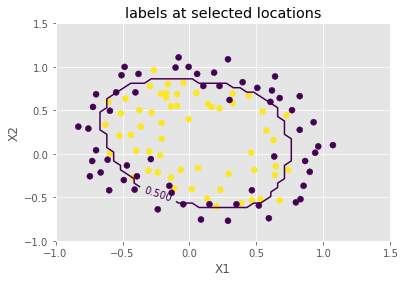

In [72]:
x1 = np.linspace(-1.0, 1.5, 50)
x2 = np.linspace(-1.0, 1.5, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.concatenate((X1.reshape(2500, -1), X2.reshape(2500, -1)), axis=1)
poly = PolynomialFeatures(6)
# X without intercept is passed to PolynomialFeatures.fit_transform.
# Intercept is added automatically.
polyX = poly.fit_transform(X)
Y = estimate(betaOpt_2, polyX, 2500, nVariablesPoly6)
Y.reshape(50, 50)
plt.figure()
CS = plt.contour(X1, X2, Y.reshape(50, 50), [0.5])
plt.clabel(CS, inline=1, fontsize=10)
plt.title('labels at selected locations')

X_1s = dF_2.iloc[:, :1]
X_2s = dF_2.iloc[:, 1:2]
colour = dF_2.iloc[:, 2:]
plt.scatter(X_1s, X_2s, c = colour)

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()